In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [2]:
import matplotlib

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import seaborn as sns
import time
import copy
import time

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [21]:
import os
import h5py

In [26]:
from skimage.measure import compare_ssim

In [7]:
from numpy.fft import ifftshift, ifft2, fftshift, fft2
from numpy import exp, pi, mean, var, std, abs, sin, cos, sum

In [8]:
os.chdir('/Volumes/jorgeamu/AFRL/dump1/hdf5_files/')

In [9]:
filenames = [os.path.abspath(x) for x in os.listdir()]

In [10]:
len(filenames)

10001

In [11]:
filenames[0]

'/Volumes/jorgeamu/AFRL/dump1/hdf5_files/pristine_019236.hdf5'

In [12]:
#filename = filenames[0]
filename = '/Volumes/jorgeamu/AFRL/dump1/hdf5_files/pristine_010000.hdf5'
f = h5py.File(filename, 'r')

In [13]:
# generate target
Uin = f['PUMP']['Data'][0,:,:]
N = 256
Lout = 10
Lin = 10e-3
deltax = 0.005
wvl = 0.532e-6
Dz = 10e3
nscreen = 10
kpow = 22/6
Rytov = 0.02
Np = 5

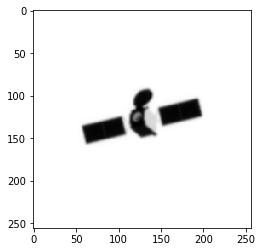

In [14]:
plt.imshow(abs(Uin), cmap='binary')

In [15]:
#phase screen parameter dictionary, hard-coded, WIP
phz_params_dict = {}
phz_params_dict['N'] = N
phz_params_dict['Lout'] = Lout
phz_params_dict['Lin'] = Lin
phz_params_dict['deltax'] = deltax
phz_params_dict['wvl'] = wvl
phz_params_dict['Dz'] = Dz
phz_params_dict['nscreen'] = nscreen
phz_params_dict['kpow'] = kpow
phz_params_dict['Rytov'] = Rytov
phz_params_dict['Np'] = Np

In [16]:
def ft_sh_phase_screen(Uin, phz_params_dict, genetic_code=None):
    N = phz_params_dict['N']
    Lout = phz_params_dict['Lout']
    Lin = phz_params_dict['Lin']
    deltax = phz_params_dict['deltax']
    wvl = phz_params_dict['wvl']
    Dz = phz_params_dict['Dz']
    nscreen = phz_params_dict['nscreen']
    kpow = phz_params_dict['kpow']
    Rytov = phz_params_dict['Rytov']
    Np = phz_params_dict['Np']

    k=2*pi/wvl
    nn=np.arange(-np.floor(N/2), np.floor(N/2))
    nx, ny = np.meshgrid(nn, nn)
    nsq = nx**2 + ny**2
    z=np.linspace(0, Dz, nscreen)

    deltaz=z[1]-z[0]
    deltaf=1/(N*deltax)

    # 0.312 is weird
    #Cn2=Rytov/(0.312 * k**(7/6) * Dz**(11/6))
    Cn2=Rytov/(1.2287075122549518 * k**(7/6) * Dz**(11/6))
    r0 = (.423*k**2*Cn2*Dz)**(-3/5) #check

    fx=nx*deltaf
    fy=ny*deltaf
    fsq=fx**2+fy**2

    Uin=Uin #np.ones([N, N])
    g=Uin

    # Generate 2x nscreens NxN arrays
    if genetic_code is None:
        genetic_code = np.zeros([N, N, nscreen, 2])
        for idx in range(nscreen-1):
            genetic_code[:,:,idx,0] = np.random.randn(N, N)
            genetic_code[:,:,idx,1] = np.random.randn(N, N)

    for idx in range(nscreen-1):
        #r0 = (.423*(k**2)*Cn2*deltaz)**(-3/5) # Constant Cn2
					 
        fm = 5.92/Lin/(2*pi)
        f0=1/Lout

        PSD_phi = 0.023 * r0**(-5/3) * exp(-(fsq/fm**2)) / (fsq + f0**2)**(kpow/2)
        PSD_phi[int(N/2),int(N/2)] = 0
        
        cnm = (genetic_code[:,:,idx,0] + 1j*genetic_code[:,:,idx,1]) * np.sqrt(PSD_phi)*deltaf
        #cnm = (np.random.randn(N, N) + 1j*np.random.randn(N, N) ) * np.sqrt(PSD_phi)*deltaf

        phz_hi = np.real(ifftshift(ifft2(ifftshift(cnm)))*(N*1)**2)
        phz_lo = np.zeros([N, N])
		  #phz_lo = subharmonics(Np, phz_hi)
        phz = phz_hi + phz_lo
		  
        Q2 = exp(-1j*pi**2*2*deltaz/k*fsq)
        G= Q2*fftshift(fft2(fftshift(g)))*deltax**2
        g = ifftshift(ifft2(ifftshift(G)))*(N*deltaf)**2
        g = exp(1j*phz) * g
		  
    Uout = g
    
    return Uout


In [17]:
Uout = ft_sh_phase_screen(Uin, phz_params_dict=phz_params_dict, genetic_code=None)

In [20]:
np.savetxt("uout.csv", Uout, delimiter=",")

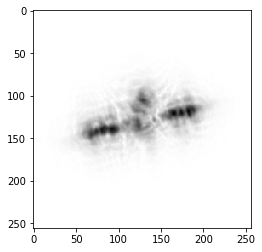

In [459]:
plt.imshow(abs(Uout), cmap='binary')

In [ ]:
X = []
y = []
for T in [1, 2, 3, 4, 5]:
    for rho in rho_vals:
        X.append([T, rho])
        y.append(master(T, rho))

In [38]:
import networkx as nx

In [228]:
G = nx.DiGraph()

In [229]:
G.add_node('A00')

In [230]:
def func(x):
    prefix = ''
    if x == 0:
        prefix = 'A'
    elif x == 1:
        prefix = 'B'
    elif x == 2:
        prefix = 'C'
    elif x == 3:
        prefix = 'D'
    elif x == 4:
        prefix = 'E'
    elif x ==5:
        prefix = 'F'
    elif x ==6:
        prefix = 'G'
    elif x ==7:
        prefix = 'H'
    else:
        return None
     
    nodes = []
    for i in range(-x, x+1):
        for j in range(-abs(abs(i)-x),abs(abs(i)-x)+1):
            node = prefix + str(i) + str(j)
            nodes.append((node, i, j))
            
    return nodes


In [231]:
for i in range(7):
    print(i, len(func(i)))

0 1
1 5
2 13
3 25
4 41
5 61
6 85


In [232]:
func(0)

[('A00', 0, 0)]

In [233]:
label, i, j = func(0)[0]
G.add_node(label, x=i, y=j)

In [235]:
list(G.nodes)

['A00']

In [236]:
for f in func(1):
    label, i, j = f
    G.add_node(label, x=i, y=j)
    G.add_edge('A00', label)

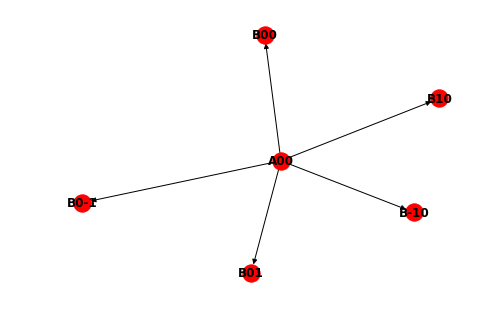

In [237]:
nx.draw(G, with_labels=True, font_weight='bold')

In [238]:
for node in list(G.nodes):
    print(node)

A00
B-10
B0-1
B00
B01
B10


In [239]:
f2 = func(2)

In [240]:
source = 'A00'
for node in G.nodes.data():
    if 'B' in node[0]:
        G.add_edge('A00', node[0])

In [241]:
f2

[('C-20', -2, 0),
 ('C-1-1', -1, -1),
 ('C-10', -1, 0),
 ('C-11', -1, 1),
 ('C0-2', 0, -2),
 ('C0-1', 0, -1),
 ('C00', 0, 0),
 ('C01', 0, 1),
 ('C02', 0, 2),
 ('C1-1', 1, -1),
 ('C10', 1, 0),
 ('C11', 1, 1),
 ('C20', 2, 0)]

In [243]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'B' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f2:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(node[0], f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

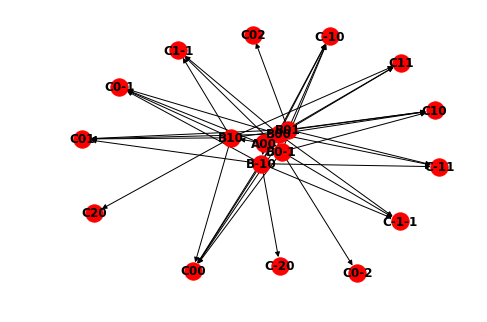

In [244]:
nx.draw(G, with_labels=True, font_weight='bold')

In [245]:
len(G)

19

In [246]:
f3 = func(3)

In [247]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'C' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f3:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

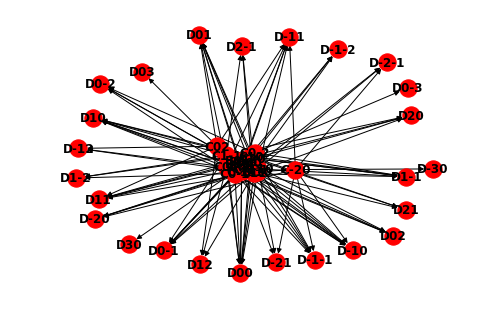

In [248]:
nx.draw(G, with_labels=True, font_weight='bold')

In [249]:
len(G)

44

In [250]:
f4 = func(4)

In [251]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'D' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f4:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

In [252]:
len(G)

85

In [253]:
f5 = func(5)

In [254]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'E' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f5:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

In [255]:
len(G)

146

In [256]:
f6 = func(6)

In [257]:
_ = copy.deepcopy(G.nodes.data())
for node in _:
    if 'F' in node[0]:
        source = node[0]
    else:
        continue
        
    x = node[1]['x']
    y = node[1]['y']
    
    for f in f6:
        if f[1]-x in [-1, 0, 1] and f[2]-y in [-1, 0, 1]:
            G.add_edge(source, f[0])
            G.nodes[f[0]]['x'] = f[1]
            G.nodes[f[0]]['y'] = f[2]

In [258]:
len(G)

231

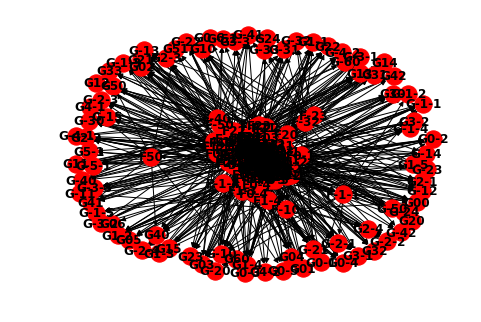

In [259]:
nx.draw(G, with_labels=True, font_weight='bold')

In [305]:
def traverse():
    path = [G['A00']]
    labels = ['A00']
    levels = 6
    for level in range(levels):
        node = path[-1]
        pick = np.random.choice(node)
        path.append(G[pick])
        labels.append(pick)
        
    return labels

In [331]:
df = pd.DataFrame(np.zeros([13,13]))
df.index = range(-6,7)
df.columns = range(-6,7)

In [332]:
for i in range(10000):
    aDict = G.nodes[traverse()[-1]]
    x = aDict['x']
    y = aDict['y']
    
    df[x][y] = df[x][y] + 1

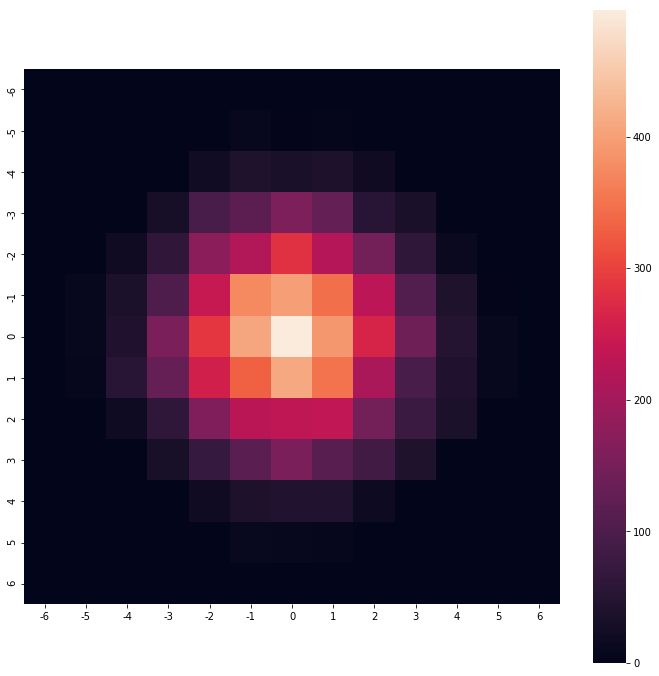

In [333]:
plt.figure(figsize=(12,12))
sns.heatmap(df, square=True)

In [ ]:
# Above there is a 2D PDF with maximum Shannon entropy...

In [354]:
anotherDict = {}
for i in range(1000):
    path = traverse()
    xwalk = []
    for j in range(len(path)):
        aDict = G.nodes[path[j]]
        x = aDict['x']
        xwalk.append(x)
        #print(G.nodes[path[j]])
    
    #print(xwalk)
    anotherDict[i] = xwalk
    #aDict = G.nodes[traverse()[-1]]
    #x = aDict['x']
    #y = aDict['y']
    
    #df[x][y] = df[x][y] + 1

<Figure size 864x864 with 0 Axes>

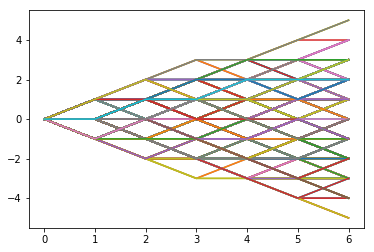

In [355]:
plt.figure(figsize=(12,12))
pd.DataFrame(anotherDict).plot(legend=False)

In [357]:
np.zeros([256,256])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [361]:
anArray = np.random.randint(2, size=(5,5))

In [415]:
np.random.randint(256)

175

In [362]:
anArray

array([[1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0]])

In [364]:
np.ones([5,5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [368]:
inv = abs(anArray - np.ones([5,5]))

In [375]:
np.random.randint(1, 5, size=(5,5)) * inv

array([[0., 1., 4., 0., 0.],
       [1., 3., 2., 0., 0.],
       [2., 3., 0., 0., 1.],
       [4., 3., 4., 4., 4.],
       [0., 0., 0., 3., 4.]])

In [376]:
inv

array([[0., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [413]:
np.random.normal(loc=0.0, scale=1.0)*100

-50.03037482548027

In [382]:
def r_generate_orig_population_arr(N, nscreen, Nindividuals):
    population = np.zeros([Nindividuals, N, N])
    for ind in range(Nindividuals):
        population[ind,:,:] = np.random.randint(512, size=(N, N))

    return population

In [384]:
topInds = r_generate_orig_population_arr(256, 10, 5)

In [396]:
topInds

array([[[196., 300., 238., ..., 254.,  26., 388.],
        [456., 287., 421., ..., 343., 318., 262.],
        [310.,  58., 116., ..., 350., 369., 198.],
        ...,
        [  0., 236., 263., ..., 293., 146., 492.],
        [ 27.,  65.,  79., ..., 387., 345., 143.],
        [338., 252., 504., ..., 353., 455., 300.]],

       [[381., 186., 460., ..., 198.,  94.,  36.],
        [486., 494., 120., ..., 222., 470., 141.],
        [401., 490., 149., ..., 372., 119., 498.],
        ...,
        [ 46., 178., 327., ...,  80., 440., 280.],
        [  7.,  53., 252., ...,  69., 271., 353.],
        [481., 374., 134., ..., 189., 351., 165.]],

       [[498., 117., 477., ..., 243., 254., 338.],
        [491.,  10., 317., ..., 204., 407., 145.],
        [ 40.,   5.,  33., ..., 369., 491., 134.],
        ...,
        [326., 352., 300., ...,  88., 218.,  16.],
        [294., 312., 391., ..., 181., 341.,  33.],
        [468., 426.,  43., ..., 169., 280., 265.]],

       [[200., 104., 165., ...,  84.,

In [404]:
def r_generate_population_arr(Nindividuals, phz_params_dict, topInds=None):
    N = phz_params_dict['N']
    nscreen = phz_params_dict['nscreen']
    population = np.zeros([Nindividuals, N, N])
    if topInds is None:
        pass

    else:
        choices = [np.random.choice(len(topInds), 2) for idx in range(Nindividuals)]
        for ind in range(Nindividuals):
            p1, p2 = choices[ind]
            p1 = topInds[p1]
            p2 = topInds[p2]
            arr1 = np.random.randint(2, size=(N,N))
            arr2 = abs(arr1 - np.ones([N,N]))
            #print(p1 * arr1 + p2 * arr2)
            population[ind,:,:] = p1 * arr1 + p2 * arr2

    return population

In [405]:
phz_params_dict = {'N' : 256, 'nscreen': 10}
r_generate_population_arr(5, phz_params_dict=phz_params_dict, topInds=topInds)

array([[[196., 104., 165., ..., 254., 263., 388.],
        [456.,  98., 421., ..., 481., 461., 375.],
        [310.,  58., 116., ..., 350., 369., 217.],
        ...,
        [386., 326., 263., ..., 293., 146., 492.],
        [ 27.,  65.,  27., ..., 387., 345., 180.],
        [488.,  31., 504., ..., 353., 455., 511.]],

       [[196., 117., 477., ..., 243., 254., 338.],
        [491., 287., 317., ..., 204., 318., 262.],
        [ 40.,  58., 116., ..., 350., 369., 198.],
        ...,
        [326., 352., 263., ..., 293., 218., 492.],
        [294., 312.,  79., ..., 181., 345., 143.],
        [468., 426.,  43., ..., 353., 455., 300.]],

       [[480., 186., 460., ..., 128.,  22., 370.],
        [278., 494., 198., ..., 222., 397., 141.],
        [467.,  40., 149., ..., 237., 119., 487.],
        ...,
        [ 46., 211.,  88., ...,  80., 440., 280.],
        [  7.,  53., 241., ...,  69., 465., 353.],
        [461., 102., 176., ..., 105., 145., 165.]],

       [[200., 186., 165., ...,  84.,

In [418]:
mutation = np.zeros([6,6])

In [423]:
mutation[2:4,2:4] = np.random.normal(loc=0.0, scale=1.0, size=[2, 2])

In [424]:
mutation

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.69415949,  0.6307952 ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.13123389, -0.67929968,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [425]:
from skimage import io
from skimage.transform import resize, rotate
from skimage.draw import polygon, ellipse

In [426]:
def generate_poly():

    def generate_sides():
        x2 = np.random.randint(low=97, high=416)
        x1 = np.random.randint(low=96, high=x2+1)
        return x1, x2

    poly = np.array((
		  (generate_sides()),
        (generate_sides()),
        (generate_sides()),
        (generate_sides()),
    ))
										      
    img = np.zeros((512, 512), dtype=np.double)
    rr, cc = polygon(poly[:, 0], poly[:, 1], img.shape)
    img[rr, cc] = 1

    if sum(sum(img)) < 10000:
        img = generate_poly()
		  
    return img

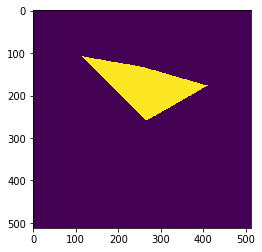

In [429]:
plt.imshow(generate_poly())

In [430]:
def generate_sides(N=256):
    x2 = np.random.randint(low=0, high=N)
    x1 = np.random.randint(low=0, high=x2)
    y2 = np.random.randint(low=0, high=N)
    y1 = np.random.randint(low=0, high=y2)
    
    return x1, x2, y1, y2

In [443]:
x1, x2, y1, y2 = generate_sides(N=256)

In [444]:
canvas = np.zeros([N, N])

In [445]:
canvas[x1:x2, y1:y2] = np.ones([x2-x1, y2-y1]) * 100

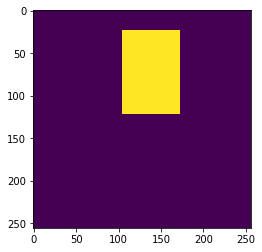

In [446]:
plt.imshow(canvas)

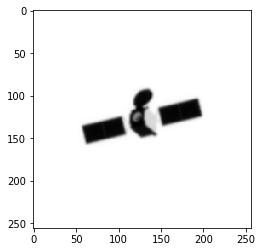

In [464]:
plt.imshow(abs(Uin), cmap='binary')

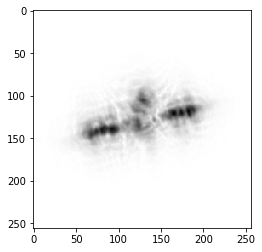

In [466]:
plt.imshow(abs(Uout), cmap='binary')

In [467]:
Uin = abs(Uin)
Uout = abs(Uout)

In [468]:
canvas = np.zeros([N, N])

In [599]:
def generate_tile_indices(N, tiles_per_side):
    aList = [0]
    nom = 1
    for i in range(tiles_per_side):
        aList.append(int(nom*N/tiles_per_side))#-1)
        nom += 1
    
    anotherList = []
    for i in range(len(aList)-1):
        anotherList.append((aList[i], aList[i+1]))
    
    finalList = []
    for u in anotherList:
        for v in anotherList:
            finalList.append((u, v))
    
    return finalList

In [600]:
def generate_individual(N, tiles_per_side):
    genetic_code = []
    for i in range(tiles_per_side**2):
        genetic_code.append(abs(np.random.normal(loc=0.0, scale=1.0)*100))

    #canvas = embody(N, tiles_per_side, genetic_code=genetic_code)
        
    return genetic_code

In [631]:
def embody(N, tiles_per_side, genetic_code):
    tile_indices = generate_tile_indices(N, tiles_per_side)
    tile_side = int(N/tiles_per_side)
    canvas = np.zeros([N, N])
    for i in range(len(tile_indices)):
        (x1, x2), (y1, y2) = tile_indices[i]
        canvas[x1:x2, y1:y2] = np.ones([tile_side, tile_side]) * genetic_code[i]
        
    return canvas

In [610]:
canvas = generate_individual(256, 4)

In [691]:
def generate_orig_population(N, Nindividuals, tiles_per_side):
    population = []
    for i in range(Nindividuals):
        population.append(generate_individual(N, tiles_per_side))
    
    return population

In [692]:
N = 256
Nindividuals = 20
tiles_per_side = 8
Ntop = 5
population = generate_orig_population(N, Nindividuals, tiles_per_side)

In [1017]:
def pick_top(N, tiles_per_side, population, Ntop, Uout, minEntropy=False):
    lses = []
    entropies = []
    free_energies = []
    for genetic_code in population:
        canvas = embody(N, tiles_per_side, genetic_code=genetic_code)
        Cout = abs(ft_sh_phase_screen(canvas, phz_params_dict=phz_params_dict, 
                                      genetic_code=None)) 
        lse = sum(sum((Cout-Uout)**2)) / N**2
        T = np.log10(lse) #- 1
        T = 10**T
        lses.append(lse)
        
        normalized_canvas = np.array(canvas) / canvas.sum()
        mean_value = np.mean(normalized_canvas)
        #shannon = - np.array([p * np.log2(p) for p in normalized_canvas]).sum()
        #entropies.append(shannon)
        #free_energy = lse + shannon * T
        
        kl = - np.array([p * np.log2(mean_value/p) for p in normalized_canvas]).sum()
        entropies.append(kl)
        free_energy = lse + kl * T
        
        free_energies.append(free_energy) # separates the values, but position don't matter

    #topIndices = pd.Series(lses).nsmallest(Ntop).index
    topIndices = pd.Series(free_energies).nsmallest(Ntop).index
    topInds = []
    topLses = []
    for ti in topIndices:
        topInds.append(population[ti])
        topLses.append(lses[ti]) 
    
    return topInds, topLses

In [1044]:
def pick_top_i(N, tiles_per_side, population, Ntop, Uout, minEntropy=False):
    lses = []
    entropies = []
    free_energies = []
    for genetic_code in population:
        canvas = embody(N, tiles_per_side, genetic_code=genetic_code)
        Cout = abs(ft_sh_phase_screen(canvas, phz_params_dict=phz_params_dict, 
                                      genetic_code=None)) 
        lse = sum(sum((Cout-Uout)**2)) / N**2
        
        #print(lse)
        T = np.log10(lse) #- 1
        T = 10**T
        lses.append(lse)
        
        normalized_canvas = np.array(canvas) / canvas.sum()
        mean_value = np.mean(normalized_canvas)
        #shannon = - np.array([p * np.log2(p) for p in normalized_canvas]).sum()
        #entropies.append(shannon)
        #free_energy = lse + shannon * T
        
        #kl = - np.array([p * np.log2(mean_value/p) for p in normalized_canvas]).sum()
        #entropies.append(kl)
        #free_energy = lse + kl * T
        
        mean_value = np.mean(canvas)
        upper_mean = np.mean(canvas[canvas > mean_value])
        lower_mean = np.mean(canvas[canvas <= mean_value])
        distance = upper_mean - lower_mean
        inv_dist = 1/distance
        #print(upper_mean, lower_mean, distance)
        
        alpha = lse/inv_dist # makes them equally important
        free_energy = lse + alpha * inv_dist
        
        free_energies.append(free_energy) # separates the values, but position don't matter

    #topIndices = pd.Series(lses).nsmallest(Ntop).index
    topIndices = pd.Series(free_energies).nsmallest(Ntop).index
    topInds = []
    topLses = []
    for ti in topIndices:
        topInds.append(population[ti])
        topLses.append(lses[ti]) 
    
    return topInds, topLses

In [682]:
topInds = pick_top(N, tiles_per_side, population, Ntop)

In [839]:
def generate_population(Nindividuals, topInds, topLses):
    population = []
    for i in range(Nindividuals):
        p1, p2 = np.random.randint(len(topInds), size=(2))
        q1 = int(topLses[p1] / (topLses[p1] + topLses[p2]) * len(topInds[p1]))
        q2 = len(topInds[p1]) - q1
        
        list(np.random.choice(len(topInds[p1]), len(topInds[p1]), replace=False))
        
        genesIdx = list(np.random.choice(len(topInds[p1]), len(topInds[p1]), replace=False))
        newInd = [0 for x in range(len(topInds[p1]))]
        for gidx in genesIdx:
            if 0 == gidx % 2:
                newInd[gidx] = topInds[p1][gidx]
            else:
                newInd[gidx] = topInds[p2][gidx]
            
        population.append(newInd)
        
    return population    

In [880]:
def generate_population_i(Nindividuals, topInds, topLses):
    population = []
    for i in range(Nindividuals):
        p1, p2 = np.random.randint(len(topInds), size=(2))
        q1 = int(topLses[p1] / (topLses[p1] + topLses[p2]) * len(topInds[p1]))
        q2 = len(topInds[p1]) - q1
        
        genesIdx = range(len(topInds[p1]))
        s1 = set(np.random.choice(genesIdx, q1, replace=False))
        s2 = set(genesIdx) - s1
        
        newInd = [0 for x in range(len(topInds[p1]))]
        for gidx in s1:
            newInd[gidx] = topInds[p1][gidx]
        for gidx in s2:
            newInd[gidx] = topInds[p2][gidx]
        
        population.append(newInd)
        
    return population   

In [895]:
def mutate(population, mutation_rate=0.1, area_affected=1):
    for ind in population:
        genesIdx = list(np.random.randint(len(ind), size=(area_affected)))
        for gidx in genesIdx:
            if 1 == np.random.randint(2):
                ind[gidx] = ind[gidx] + ind[gidx] * mutation_rate
            else:
                ind[gidx] = ind[gidx] - ind[gidx] * mutation_rate
                    
    return population

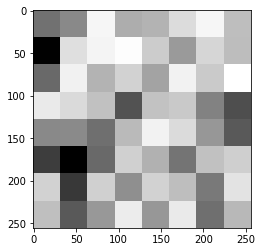

In [690]:
plt.imshow(embody(N, tiles_per_side, genetic_code=topInds[3]), cmap='binary')

In [734]:
N = 256
Nindividuals = 20
tiles_per_side = 8
Ntop = 5
Ngenerations = 10
population_orig = generate_orig_population(N, Nindividuals, tiles_per_side)

population = population_orig
for generation in range(Ngenerations):
    start = time.time()
    topInds = pick_top(N, tiles_per_side, population, Ntop)
    population = generate_population(Nindividuals, topInds)
    population = mutate(population, mutation_rate=0.30)
    print(generation, time.time()-start)

0 4.645502805709839
1 5.285561800003052
2 5.133063793182373
3 5.0661680698394775
4 4.942259073257446
5 4.851145029067993
6 4.993346929550171
7 4.823416233062744
8 4.521560907363892
9 4.589969158172607


In [914]:
N = 256
Nindividuals = 100
tiles_per_side = 16
elitism = 0.1
Ntop = int(Nindividuals * elitism)
Ngenerations = 800
population_orig = generate_orig_population(N, Nindividuals, tiles_per_side)

topLsesList = []
population = population_orig
for generation in range(Ngenerations):
    mutation_rate = 0.2 #(Ngenerations/(generation+1))-1
    area_affected = int((tiles_per_side**2)/16)
    start = time.time()
    topInds, topLses = pick_top(N, tiles_per_side, population, Ntop, Uout)
    population = generate_population_i(Nindividuals, topInds, topLses)
    population = mutate(population, mutation_rate=0.3, area_affected=area_affected)
    print(generation, time.time()-start, np.mean(topLses), np.median(topLses), np.log(np.mean(topLses)))
    topLsesList.append(topLses)
    
    if 0 == generation % 100:
        np.savez('t_population_serial.npz', population)

0 35.09713816642761 14952676928081.906 15212386472196.568 30.33591145847072
1 26.235112190246582 12848905317469.91 13042708128452.824 30.18427973433901
2 25.03426480293274 11290414890140.576 11468086319325.98 30.05497524187732
3 33.58601188659668 9823543726940.793 9954514546600.906 29.91580304152152
4 28.609320402145386 8367195899849.192 8473571836476.086 29.75533992635972
5 24.08933401107788 7250179579459.8 7255430511480.861 29.612047354069034
6 23.801719903945923 6521694045529.195 6693275264066.572 29.5061552810529
7 22.79005193710327 5594771282582.4 5614772293987.068 29.35285357796186
8 23.27570080757141 4837274419022.091 4872251765934.471 29.207372541470455
9 24.25571584701538 4214503551477.714 4274687239521.2256 29.06955291906427
10 23.817234992980957 3620792584373.922 3672314817251.1836 28.917714063760705
11 24.74167490005493 3056499950927.447 3067335595305.681 28.748291570360045
12 23.4082190990448 2656370587825.4185 2741287746741.2734 28.60798186635826
13 23.73205304145813 2262

107 23.600908041000366 551625.7797315673 403373.25189228595 13.220625160088307
108 23.970252990722656 388521.9203081008 272098.62593010557 12.8701048701276
109 23.99937605857849 629933.9095412763 254588.2378450462 13.353370187374711
110 24.14944076538086 1728735.3459463175 633769.9873214595 14.36290068524915
111 24.718281984329224 1275749.1661135615 1342380.0227609943 14.059044145281922
112 23.993215084075928 1252537.7326410671 815223.0651399827 14.040682237348515
113 24.466370820999146 1368808.5396025765 1486486.21773373 14.12945124029181
114 24.19205093383789 3078192.841356865 3223229.6776020713 14.93985324293139
115 24.400707006454468 339640.43585208594 214421.59551665655 12.73564279538914
116 24.075270175933838 1203079.7722667137 961751.7166840631 14.000395303869482
117 24.474596977233887 1322700.0093733768 632779.0705823305 14.095185667100687
118 25.45961594581604 975543.4066302914 324422.3961781516 13.790749934857288
119 24.732139110565186 2159026.5953656314 1678796.960938323 14.

212 23.978573083877563 1699061.664646859 1224815.1150169275 14.345586694666922
213 23.69010591506958 1329729.5291483086 1299524.827865685 14.10048611797455
214 23.62191390991211 2392105.668153225 1255201.507239093 14.687684568726286
215 22.957205057144165 3280938.2167024747 3341364.9943656083 15.00363998113579
216 22.984834909439087 1946332.6977045226 641897.2988444809 14.481457492019942
217 23.15287709236145 1051386.9273535481 862533.7007483795 13.865620733728791
218 22.520288705825806 4369744.575588596 3101050.121779355 15.290215115841473
219 22.529911041259766 968560.3804455415 451017.89228505665 13.783566104176561
220 23.576729774475098 625409.7363087434 444194.73980908876 13.346162292015082
221 23.01053285598755 4591506.747330533 3766958.479238697 15.33971879556105
222 23.2936589717865 1375862.3343573895 703739.1259168768 14.134591244764936
223 23.71219515800476 1470159.7983710675 1084884.7991296838 14.200881659221684
224 23.51149606704712 3782480.020687788 1559185.2794911326 15.1

317 23.87027883529663 1512510.22764212 540297.1797127015 14.229281230941705
318 23.306588172912598 4063373.119514936 4273982.484316697 15.217524004254518
319 23.31202220916748 3491955.800882241 2950033.7339985836 15.065972538611309
320 23.29632592201233 1813146.9749379712 686790.148576212 14.410574553708784
321 22.639634370803833 1177939.0668326053 1198803.3141395217 13.979276915907283
322 22.831990003585815 3812977.3397771106 3514189.0271692043 15.153920895936416
323 23.233219146728516 4665193.374763724 4161071.042816791 15.355639843658206
324 23.587140798568726 5469039.577810058 4142727.0527193593 15.514613579057169
325 23.009868144989014 3041922.8529098737 2426449.500821051 14.928000390832146
326 23.442960262298584 783107.1247395002 309450.2304870741 13.571024778819849
327 23.192355155944824 3918239.845314079 3364402.150379495 15.181153091874872
328 22.992987155914307 1209913.4124417577 1528930.5060736497 14.006059355046897
329 23.05285906791687 3097079.2066612546 1441632.8238916304

422 23.515859842300415 1347458.41002513 436837.9380679823 14.11373071674361
423 23.140650033950806 5052531.397713885 5226079.944278136 15.435399942533309
424 22.85851502418518 1755345.4207229249 1250608.9113647456 14.37817621644015
425 23.378140926361084 4110602.7655710094 1785869.9235291309 15.229080234008926
426 22.947214126586914 649433.391269915 513389.4533488279 13.383855555976842
427 23.357986211776733 647228.5261197513 653747.2999278331 13.380454719959898
428 23.860865116119385 7851315.0393804265 6862511.311019452 15.876191596668708
429 22.873845100402832 5300415.414763925 4797301.154407004 15.483295755594924
430 23.212290048599243 9694464.81381513 10261719.619225794 16.08706564284691
431 23.40840220451355 13880807.638640394 13853329.59060343 16.446017698572053
432 22.938354969024658 2723025.5916973553 3234575.7087106425 14.817254169958172
433 23.85594606399536 6598498.755179713 6576741.866271172 15.702352719786994
434 23.13612723350525 5816559.337316146 6842579.590887518 15.576

527 23.751477003097534 8235664.740783757 7948284.946730852 15.923984639742729
528 23.81363034248352 5301545.477383101 1549579.6830854523 15.483508935521723
529 22.699762105941772 1899237.7629749426 2023993.9811021944 14.456963186261886
530 23.161125898361206 4777373.990393342 4589793.351248345 15.379401579111535
531 23.1108980178833 2456687.2014825977 1929749.4400260323 14.71432433427493
532 22.908893823623657 4455000.8414832605 3656205.6413539927 15.309537807772161
533 23.69621181488037 1713831.156733473 1391354.5053175008 14.35424186496407
534 23.805026054382324 16401015.05257234 17447638.302754715 16.61285378432864
535 23.148098945617676 1809859.3976228733 1797524.0054438119 14.408759719353352
536 23.259099006652832 6889637.934516139 8447606.986140339 15.745529092191966
537 23.502493858337402 5583692.23974572 622252.4964784663 15.535360807246759
538 23.373634815216064 2319136.36070251 2072555.6487220835 14.656705416019282
539 22.984594106674194 3485810.7140864404 1607141.957091082 1

632 23.96635413169861 1209111.0725864202 1151258.7545731245 14.005395996829794
633 24.67510199546814 7981757.4952177005 7904375.619804023 15.892669182673227
634 24.456303119659424 4278038.478833577 3189311.9159201346 15.26900516316879
635 25.777186155319214 1996908.8681997154 908587.7243289647 14.507110977005004
636 24.455721855163574 1513178.909555509 682493.7678142797 14.22972323399883
637 24.353883981704712 1806246.8551033451 1347115.3005696554 14.406761689722108
638 24.09451198577881 1296383.2062276287 820547.1272135897 14.075088796006128
639 24.140381336212158 4422283.409862411 4333354.726624106 15.302166729223773
640 23.58809494972229 3259266.029868484 1815388.8875675478 14.997012583782006
641 23.720368146896362 6388337.40402676 5703450.459445359 15.669984605335904
642 24.035299062728882 1519932.2650574704 933696.9923251648 14.234176329367333
643 26.026078939437866 568003.9191248773 112891.41319164503 13.249883597547226
644 24.381189823150635 1051337.2206832452 546177.4505241101 

737 23.261836051940918 8859484.226878298 5540413.318847021 15.996999107216162
738 23.357330083847046 8655852.348222341 5796576.539905024 15.9737462221852
739 22.47787594795227 9121203.390356941 8666747.491497785 16.02611230404282
740 24.290829181671143 3843270.4039180474 2974368.820569924 15.161834229787761
741 24.737931966781616 2843400.215749412 1219235.4169713994 14.860511153060996
742 24.61979913711548 3115605.3741467623 1410970.299501963 14.951934032941953
743 24.54891276359558 4250116.314613359 4746939.047573885 15.26245690867042
744 24.47834587097168 31878912.189833384 37363550.68856865 17.277455289278816
745 24.071531057357788 6933660.399493435 5642206.284181301 15.751898427894686
746 23.610106945037842 6267237.4035856845 3987428.7081385255 15.650846210025257
747 24.046144008636475 5419858.490881534 4552323.178198805 15.505580264381548
748 24.52523398399353 4379689.956405471 2552193.6615386633 15.29248849363837
749 24.461271047592163 4996625.760537647 6202880.451138606 15.42427

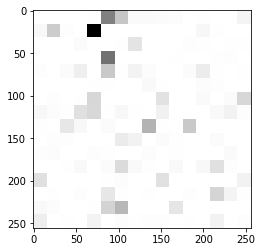

In [922]:
plt.imshow(embody(N, tiles_per_side, genetic_code=population[0]), cmap='binary', vmin=0)

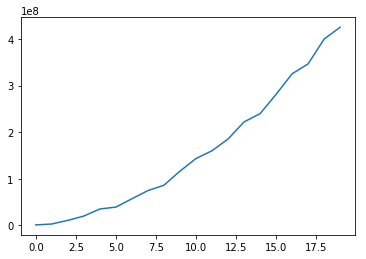

In [884]:
pd.DataFrame(topLsesList).median().plot()

In [804]:
pd.DataFrame(topLsesList).median()

0     1.559517e+05
1     3.848154e+05
2     9.381596e+05
3     1.942174e+06
4     2.909412e+06
5     3.439965e+06
6     4.370897e+06
7     5.448379e+06
8     6.702215e+06
9     8.389647e+06
10    9.644775e+06
11    1.091063e+07
12    1.233970e+07
13    1.462250e+07
14    1.843617e+07
15    1.975447e+07
16    2.324371e+07
17    2.645869e+07
18    2.880892e+07
19    3.094896e+07
dtype: float64

In [ ]:
46 24.838474988937378 110447565.50240383
47 28.07027816772461 18535809.581719004
48 26.46947717666626 7031738.089971
49 25.436942100524902 8176684.949447786

In [ ]:
47 26.477367639541626 123730469.26771636 85830310.62220697 18.633616122858278
48 25.14146399497986 42649339.461053185 22344552.414522223 17.568522344350686
49 27.256371021270752 100392662.49986187 74861426.20632024 18.424599679880536

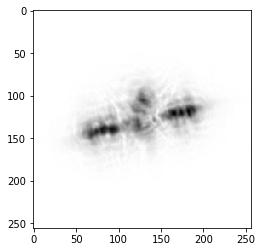

In [903]:
plt.imshow(Uout, cmap='binary', vmin=0)

In [1035]:
N = 256
Nindividuals = 100
tiles_per_side = 16
elitism = 0.1
Ntop = int(Nindividuals * elitism)
Ngenerations = 50
population_orig = generate_orig_population(N, Nindividuals, tiles_per_side)

topLsesList = []
population = population_orig
for generation in range(Ngenerations):
    mutation_rate = 0.2 #(Ngenerations/(generation+1))-1
    area_affected = int((tiles_per_side**2)/16)
    start = time.time()
    topInds, topLses = pick_top(N, tiles_per_side, population, Ntop, Uout)
    population = generate_population_i(Nindividuals, topInds, topLses)
    population = mutate(population, mutation_rate=0.3, area_affected=area_affected)
    print(generation, time.time()-start, np.mean(topLses),
          np.median(topLses), np.log10(np.mean(topLses)))
    topLsesList.append(topLses)
    
    #if 0 == generation % 100:
    #    np.savez('t_population_serial.npz', population)
    
# Temperature parameter should decrease, be same order of magnitude as lse/energy

KeyboardInterrupt: 

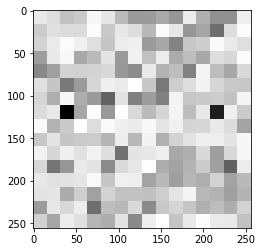

In [987]:
plt.imshow(embody(N, tiles_per_side, genetic_code=topInds[5]), cmap='binary', vmin=0)

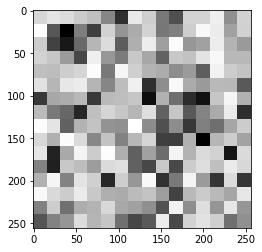

In [970]:
plt.imshow(embody(N, tiles_per_side, genetic_code=topInds[0]), cmap='binary', vmin=0)

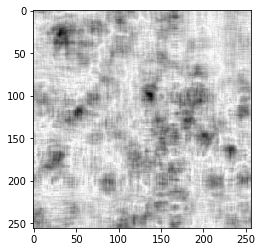

In [974]:
plt.imshow(abs(ft_sh_phase_screen(embody(N, tiles_per_side, genetic_code=topInds[0]), 
            phz_params_dict=phz_params_dict, genetic_code=None)), cmap='binary', vmin=0)

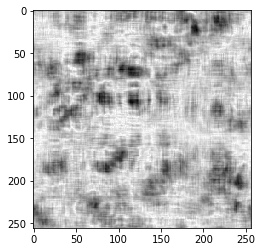

In [989]:
plt.imshow(abs(ft_sh_phase_screen(embody(N, tiles_per_side, genetic_code=topInds[1]), 
            phz_params_dict=phz_params_dict, genetic_code=None)), cmap='binary', vmin=0)

In [999]:
#should also minimize 'macro' entropy, with the average of the tiles

In [1052]:
N = 256
Nindividuals = 100
tiles_per_side = 16
elitism = 0.1
Ntop = int(Nindividuals * elitism)
Ngenerations = 50
population_orig = generate_orig_population(N, Nindividuals, tiles_per_side)

topLsesList = []
population = population_orig
for generation in range(Ngenerations):
    mutation_rate = 0.2 #(Ngenerations/(generation+1))-1
    area_affected = int((tiles_per_side**2)/16)
    start = time.time()
    topInds, topLses = pick_top_i(N, tiles_per_side, population, Ntop, Uout)
    population = generate_population_i(Nindividuals, topInds, topLses)
    population = mutate(population, mutation_rate=0.3, area_affected=area_affected)
    print(generation, time.time()-start, np.mean(topLses),
          np.median(topLses), np.log10(np.mean(topLses)))
    topLsesList.append(topLses)
    
    #if 0 == generation % 100:
    #    np.savez('t_population_serial.npz', population)
    
# Temperature parameter should decrease, be same order of magnitude as lse/energy

0 25.33740496635437 9080.559627223634 9150.301896905345 3.9581126145481473
1 24.45356798171997 8296.79117580148 8301.907598103599 3.918910159352706
2 23.78957176208496 7651.534151976264 7737.080773666682 3.8837485210279237
3 32.52759099006653 6988.4871515101495 6922.5274364946745 3.844383171044523
4 35.35800790786743 6335.687956221775 6386.200589928036 3.801793779340873
5 23.706010103225708 5883.376139308272 5914.494981561533 3.769626614833824
6 23.300528049468994 5396.142919109971 5456.952862073589 3.7320834436238197
7 24.696110010147095 4993.782922882626 5032.008617226147 3.698429659872909
8 24.855300903320312 4671.432895746873 4647.247937868499 3.669450114670095
9 24.596949100494385 4350.2632551629995 4343.931483216644 3.6385155389788255
10 24.14551305770874 4114.776490536584 4139.7361695759955 3.6143462498610717
11 24.235837936401367 3940.944466717518 3956.6348838536387 3.5956003151071485
12 23.944359302520752 3732.4395466046617 3742.1612248757583 3.571992782294283
13 25.7464358806

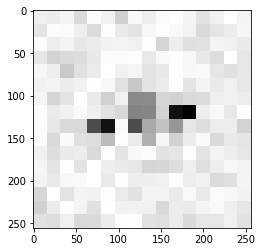

In [1053]:
plt.imshow(embody(N, tiles_per_side, genetic_code=topInds[0]), cmap='binary')

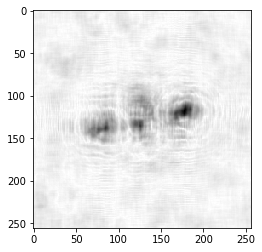

In [1054]:
plt.imshow(abs(ft_sh_phase_screen(embody(N, tiles_per_side, genetic_code=topInds[0]), 
            phz_params_dict=phz_params_dict, genetic_code=None)), cmap='binary', vmin=0)

In [ ]:
N = 256
Nindividuals = 100
tiles_per_side = 64
elitism = 0.1
Ntop = int(Nindividuals * elitism)
Ngenerations = 50
population_orig = generate_orig_population(N, Nindividuals, tiles_per_side)

topLsesList = []
population = population_orig
for generation in range(Ngenerations):
    mutation_rate = 0.2 #(Ngenerations/(generation+1))-1
    area_affected = int((tiles_per_side**2)/16)
    start = time.time()
    topInds, topLses = pick_top_i(N, tiles_per_side, population, Ntop, Uout)
    population = generate_population_i(Nindividuals, topInds, topLses)
    population = mutate(population, mutation_rate=0.3, area_affected=area_affected)
    print(generation, time.time()-start, np.mean(topLses),
          np.median(topLses), np.log10(np.mean(topLses)))
    topLsesList.append(topLses)
    
    #if 0 == generation % 100:
    #    np.savez('t_population_serial.npz', population)
    
# Temperature parameter should decrease, be same order of magnitude as lse/energy

0 37.18842887878418 9972.95985639231 9978.61480723742 3.9988240709020735
1 36.322962045669556 9806.605805900812 9812.175400081784 3.9915187184056906
2 41.486878871917725 9618.888182048806 9613.846333999063 3.9831248761640126
3 39.795446157455444 9466.603753293293 9483.49967177039 3.9761941990926903
4 36.11193299293518 9275.783875830273 9297.89685776997 3.9673506210970637
